In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tires-garage-dataset/Evaluation-dataset.csv


**Loading the CSV file**

In [2]:
df = pd.read_csv("/kaggle/input/tires-garage-dataset/Evaluation-dataset.csv", delimiter = ",")

**First five rows of data**

In [3]:
df.head()

,"Tires where delivered to the garage of my choice,the garage notified me when they had been delivered. A day and time was arranged with the garage and I went and had them fitted,a Hassel free experience.",garage service positive,ease of booking positive,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,service was excellent. Only slight downside wa...,length of fitting positive,ease of booking positive,ease of booking negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Shape of the data**

In [4]:
df.shape

(10131, 15)

**EDA**
**Modifying the columns name**

In [5]:
# Define the base column names
column_list = ['Review'] + ['Column' + str(i) for i in range(15)]


print(column_list)


['Review', 'Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11', 'Column12', 'Column13', 'Column14']


Column_name

In [6]:
data= pd.read_csv("/kaggle/input/tires-garage-dataset/Evaluation-dataset.csv", names = column_list)


In [7]:
data.head()

,Review,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,Tires where delivered to the garage of my choi...,garage service positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Checking the Null Values**

In [8]:
def check_null_values(df):
    for column in df.columns:
        null_count = df[column].isnull().sum()
        print(f"The column '{column}' has {null_count} null values.")

check_null_values(data)


The column 'Review' has 0 null values.
The column 'Column0' has 2003 null values.
The column 'Column1' has 5893 null values.
The column 'Column2' has 8594 null values.
The column 'Column3' has 9687 null values.
The column 'Column4' has 10004 null values.
The column 'Column5' has 10096 null values.
The column 'Column6' has 10119 null values.
The column 'Column7' has 10124 null values.
The column 'Column8' has 10128 null values.
The column 'Column9' has 10131 null values.
The column 'Column10' has 10131 null values.
The column 'Column11' has 10131 null values.
The column 'Column12' has 10131 null values.
The column 'Column13' has 10131 null values.
The column 'Column14' has 10132 null values.


**Data Information and type of data present in columns**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10132 entries, 0 to 10131
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review    10132 non-null  object 
 1   Column0   8129 non-null   object 
 2   Column1   4239 non-null   object 
 3   Column2   1538 non-null   object 
 4   Column3   445 non-null    object 
 5   Column4   128 non-null    object 
 6   Column5   36 non-null     object 
 7   Column6   13 non-null     object 
 8   Column7   8 non-null      object 
 9   Column8   4 non-null      object 
 10  Column9   1 non-null      object 
 11  Column10  1 non-null      object 
 12  Column11  1 non-null      object 
 13  Column12  1 non-null      object 
 14  Column13  1 non-null      object 
 15  Column14  0 non-null      float64
dtypes: float64(1), object(15)
memory usage: 1.2+ MB


**Drop the last columns as it doesn't contain any values**

In [10]:
data.drop('Column14', axis=1, inplace=True)

In [11]:
data.nunique(axis = 0)


Review      10128
Column0        84
Column1        65
Column2        52
Column3        50
Column4        37
Column5        20
Column6         9
Column7         6
Column8         2
Column9         1
Column10        1
Column11        1
Column12        1
Column13        1
dtype: int64

In [12]:
data.isnull().sum()


Review          0
Column0      2003
Column1      5893
Column2      8594
Column3      9687
Column4     10004
Column5     10096
Column6     10119
Column7     10124
Column8     10128
Column9     10131
Column10    10131
Column11    10131
Column12    10131
Column13    10131
dtype: int64

****The code creates a summary table showing the counts of unique values for columns 0 and 2 through 15 of a DataFrame, and prints the result.****

In [13]:
counts_dict = {}
counts_dict['Column0'] = data['Column0'].value_counts()

# Loop through columns 2 to 15 and add their counts to the dictionary
for col in data.columns[2:16]:
    counts_dict[col] = data[col].value_counts()

# Combine all the counts into one table
review = pd.concat(counts_dict, axis=1)

# Print the result
print(review)

                               Column0  Column1  Column2  Column3  Column4  \
value for money positive        3334.0   1113.0    253.0     58.0     10.0   
garage service positive         1106.0    608.0    240.0     57.0     12.0   
ease of booking positive         644.0    413.0    104.0     19.0      6.0   
location positive                480.0    390.0    167.0     19.0      7.0   
length of fitting positive       285.0    242.0    102.0     22.0      5.0   
...                                ...      ...      ...      ...      ...   
discount not applied positive      NaN      NaN      NaN      NaN      1.0   
failed payment positive            NaN      NaN      NaN      NaN      NaN   
late notice positive               NaN      NaN      NaN      NaN      NaN   
call wait time positive            NaN      NaN      NaN      NaN      NaN   
no stock positive                  NaN      NaN      NaN      NaN      NaN   

                               Column5  Column6  Column7  Colum

In [14]:
review.shape

(106, 14)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
review_sum = review.sum(axis=1, skipna=True)

# Get the top 10 categories
top_10_reviews = review_sum.nlargest(10)
top_10_indices = top_10_reviews.index
top_10_data = review.loc[top_10_indices]

**Subtheme Identification**

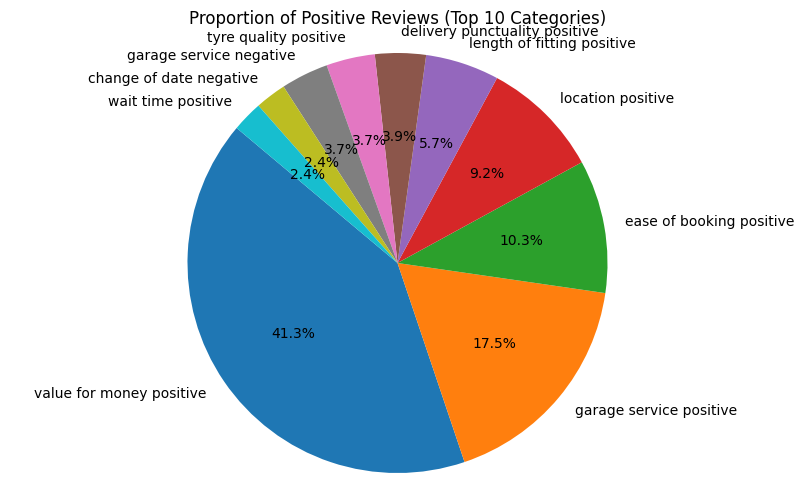

In [17]:
# Plotting the Pie Plot
plt.figure(figsize=(10, 6))
plt.pie(top_10_reviews, labels=top_10_reviews.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Positive Reviews (Top 10 Categories)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


****The heatmap visualizes the distribution of positive reviews across the top 10 categories, with color intensity indicating the review count for each category and column.****

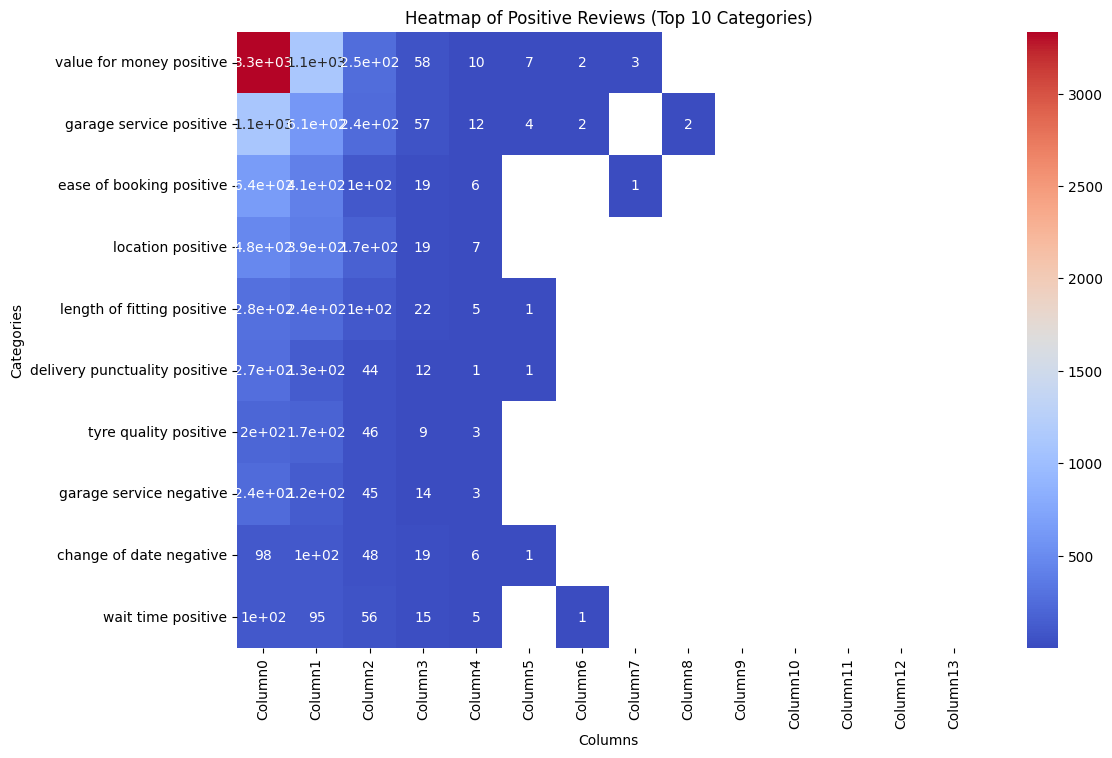

In [18]:
# Plotting the Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(top_10_data, annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Positive Reviews (Top 10 Categories)')
plt.xlabel('Columns')
plt.ylabel('Categories')
plt.show()


****The plot represents trends in the counts of unique values across different columns for the first 5 rows of the 'review' DataFrame, showing how these counts vary across the columns.****

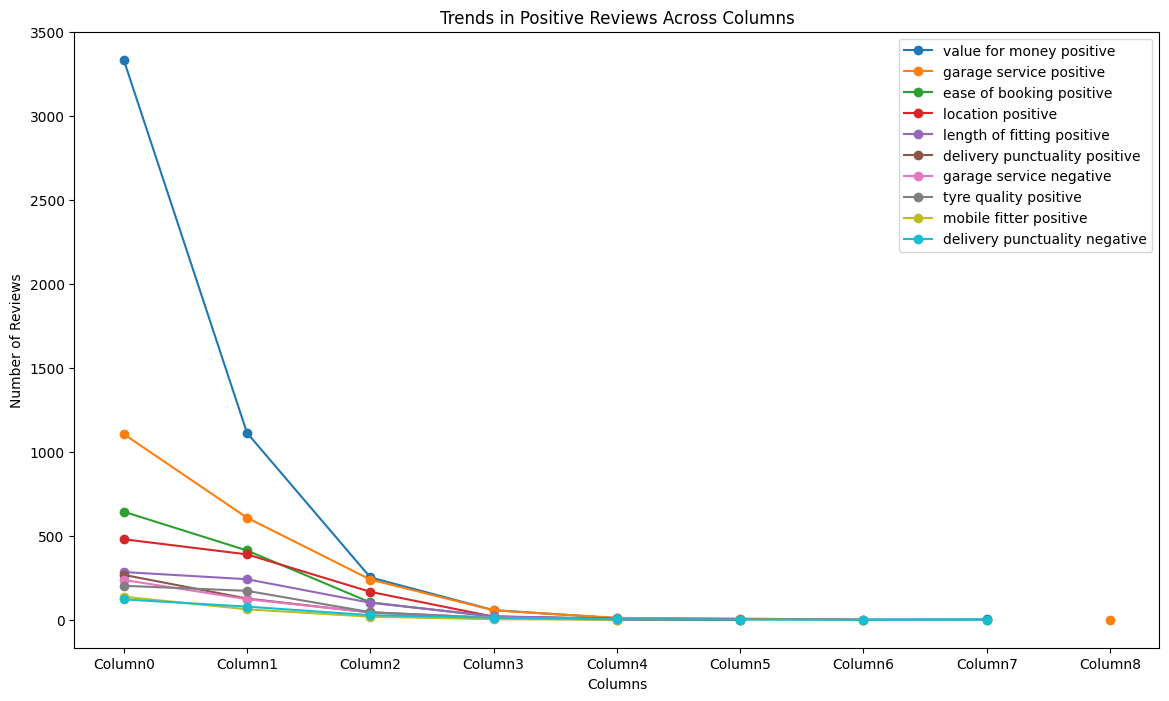

In [22]:
plt.figure(figsize=(14, 8))
for index in review.index[:10]:  # Only taking first 10 rows for clarity
    plt.plot(review.columns, review.loc[index], marker='o', label=index)

plt.title('Trends in Positive Reviews Across Columns')
plt.xlabel('Columns')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()


In [23]:
# Initialize lists to store the counts
positive_counts = []
negative_counts = []

# Loop through each row to count positive and negative sentiments
for index, row in data.iterrows():
    positive_count = sum('positive' in str(row[col]) for col in data.columns[:])
    negative_count = sum('negative' in str(row[col]) for col in data.columns[:])
    positive_counts.append(positive_count)
    negative_counts.append(negative_count)
    

# Add these counts as new columns to the original DataFrame
data['Positive Sentiment Count'] = positive_counts
data['Negative Sentiment Count'] = negative_counts

# Display the updated DataFrame



In [24]:
data.shape

(10132, 17)

In [25]:
positive_sen = sum(data['Positive Sentiment Count'])
negative_sen = sum(data['Negative Sentiment Count'])

print("The total no. of sentiments with positive polarity tag: ", positive_sen)
print("The total no. of sentiments with negative polarity tag: ", negative_sen)

The total no. of sentiments with positive polarity tag:  11913
The total no. of sentiments with negative polarity tag:  2625


In [26]:
data.columns

Index(['Review', 'Column0', 'Column1', 'Column2', 'Column3', 'Column4',
       'Column5', 'Column6', 'Column7', 'Column8', 'Column9', 'Column10',
       'Column11', 'Column12', 'Column13', 'Positive Sentiment Count',
       'Negative Sentiment Count'],
      dtype='object')

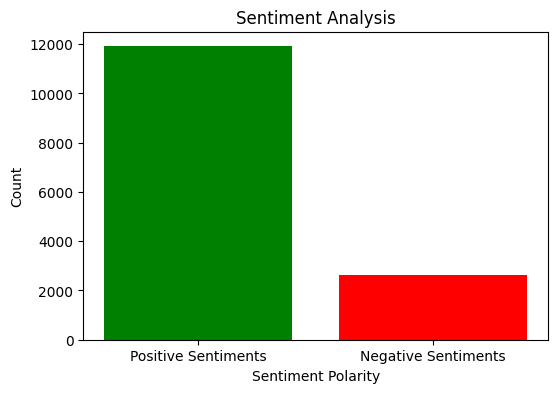

In [27]:
labels = ['Positive Sentiments', 'Negative Sentiments']
values = [positive_sen, negative_sen]
 
plt.figure(figsize = (6,4))
plt.bar(labels, values, color = ['green', 'red'])
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.title("Sentiment Analysis")
plt.show()

In [28]:
# Count the rows containing at least one positive sentiment
x = data[data['Positive Sentiment Count'] > 0].shape[0]

# Count the rows containing at least one negative sentiment
y = data[data['Negative Sentiment Count'] > 0].shape[0]

# Count the rows containing neither positive nor negative sentiment
z = data[(data['Positive Sentiment Count'] == 0) & (data['Negative Sentiment Count'] == 0)].shape[0]

print('Total rows containing at least one positive sentiment: ', x)
print('Total rows containing at least one negative sentiment: ', y)
print('Total rows containing neither positive nor negative sentiment: ', z)



Total rows containing at least one positive sentiment:  7192
Total rows containing at least one negative sentiment:  1475
Total rows containing neither positive nor negative sentiment:  2002


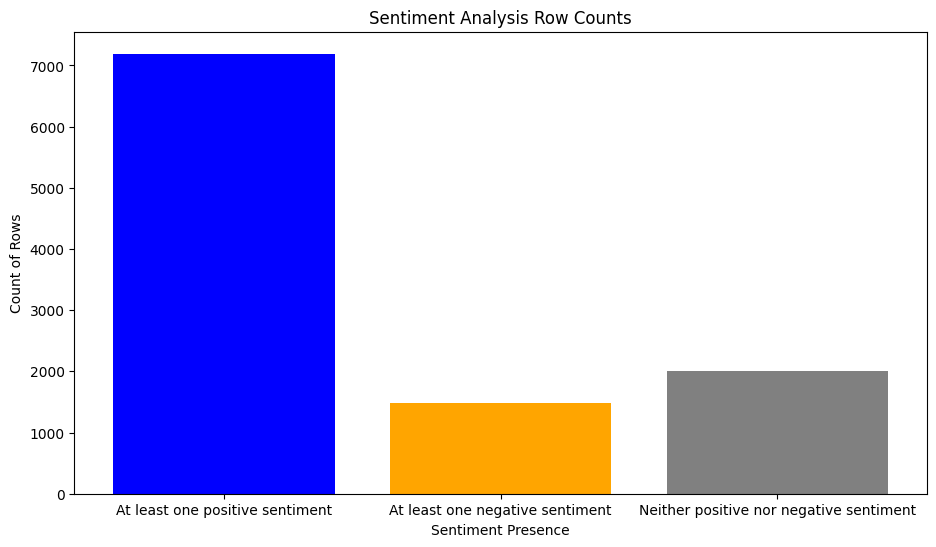

In [29]:
labels = ['At least one positive sentiment', 'At least one negative sentiment', 'Neither positive nor negative sentiment']
values = [x, y, z]

plt.figure(figsize=(11, 6))
plt.bar(labels, values, color=['blue', 'orange', 'gray'])
plt.xlabel('Sentiment Presence')
plt.ylabel('Count of Rows')
plt.title('Sentiment Analysis Row Counts')
plt.show()

**data cleaning step**

In [30]:
def clean_column(column):
    column = column.str.lower()
    column = column.str.replace('[^\w\s]', '', regex=True)
    column = column.str.replace('\d', '', regex=True)
    return column

# Apply the cleaning function to each column if it is of string type
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = clean_column(data[col])

print(data)

                                                  Review  \
0      tires where delivered to the garage of my choi...   
1      easy tyre selection process competitive pricin...   
2              very easy to use and good value for money   
3                  really easy and convenient to arrange   
4      it was so easy to select tyre sizes and arrang...   
...                                                  ...   
10127  i ordered the wrong tyres however redacted arr...   
10128  good experience first time i have used redacte...   
10129  i ordered the tyre i needed on line booked a s...   
10130  excellent service from point of order to fitti...   
10131  seamless well managed at both ends i would rec...   

                          Column0                        Column1  \
0         garage service positive       ease of booking positive   
1         garage service positive       value for money positive   
2        value for money positive                            NaN   
3      

In [31]:
data

,Review,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Positive Sentiment Count,Negative Sentiment Count
0,tires where delivered to the garage of my choi...,garage service positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
1,easy tyre selection process competitive pricin...,garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
2,very easy to use and good value for money,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,it was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10127,i ordered the wrong tyres however redacted arr...,refund positive,delivery punctuality positive,refund timescale positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
10128,good experience first time i have used redacte...,length of fitting positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
10129,i ordered the tyre i needed on line booked a s...,location positive,delivery punctuality positive,length of fitting positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
10130,excellent service from point of order to fitti...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [32]:
!pip install nltk


****The VADER model is a rule-based sentiment analysis tool that uses a predefined lexicon and syntactical rules to assign sentiment scores to text, particularly effective for social media content.****

In [33]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.4 MB/s eta 0:00:00 0:00:010m


In [34]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [35]:
sia = SentimentIntensityAnalyzer()


In [36]:
data['Review'][0]


'tires where delivered to the garage of my choicethe garage notified me when they had been delivered a day and time was arranged with the garage and i went and had them fitteda hassel free experience'

In [37]:
sia.polarity_scores(data['Review'][0])


{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.5106}

In [38]:
Sentiments = pd.DataFrame()
Sentiments['Combined_Text'] = data.iloc[:, :-2].apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

In [39]:
Sentiments

,Combined_Text
0,tires where delivered to the garage of my choi...
1,easy tyre selection process competitive pricin...
2,very easy to use and good value for money valu...
3,really easy and convenient to arrange ease of ...
4,it was so easy to select tyre sizes and arrang...
...,...
10127,i ordered the wrong tyres however redacted arr...
10128,good experience first time i have used redacte...
10129,i ordered the tyre i needed on line booked a s...
10130,excellent service from point of order to fitti...


In [40]:
Sentiments['Combined_Text'][12]

'great price and easy to use value for money positive'

In [41]:
sia.polarity_scores(Sentiments['Combined_Text'][12])


{'neg': 0.0, 'neu': 0.316, 'pos': 0.684, 'compound': 0.9186}

**Creating a function for the Polarirty Scores**

In [42]:
results = []
for i, row in tqdm(Sentiments.iterrows(), total=len(Sentiments)):
    text = row['Combined_Text']
    scores = sia.polarity_scores(text)
    results.append(scores)

# Convert the list of results to a DataFrame
scores_df = pd.DataFrame(results)

# Combine the scores with the original Sentiments DataFrame
Sentiments = pd.concat([Sentiments, scores_df], axis=1)


  0%|          | 0/10132 [00:00<?, ?it/s]

In [43]:
Sentiments.head()

,Combined_Text,neg,neu,pos,compound
0,tires where delivered to the garage of my choi...,0.0,0.740,0.260,0.9186
1,easy tyre selection process competitive pricin...,0.0,0.381,0.619,0.9509
2,very easy to use and good value for money valu...,0.0,0.356,0.644,0.9259
3,really easy and convenient to arrange ease of ...,0.0,0.430,0.570,0.8516
4,it was so easy to select tyre sizes and arrang...,0.0,0.473,0.527,0.9645


In [44]:
Sentiments.tail()

,Combined_Text,neg,neu,pos,compound
10127,i ordered the wrong tyres however redacted arr...,0.063,0.606,0.331,0.9231
10128,good experience first time i have used redacte...,0.000,0.651,0.349,0.9324
10129,i ordered the tyre i needed on line booked a s...,0.000,0.671,0.329,0.9686
10130,excellent service from point of order to fitti...,0.232,0.474,0.294,0.3182
10131,seamless well managed at both ends i would rec...,0.000,0.566,0.434,0.5574


In [45]:
def vadar_sentiment(text):
    scores = sia.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply VADER sentiment analysis
Sentiments['Vadar_Sentiment'] = Sentiments['Combined_Text'].apply(vadar_sentiment)


In [46]:
Sentiments.tail()

,Combined_Text,neg,neu,pos,compound,Vadar_Sentiment
10127,i ordered the wrong tyres however redacted arr...,0.063,0.606,0.331,0.9231,positive
10128,good experience first time i have used redacte...,0.000,0.651,0.349,0.9324,positive
10129,i ordered the tyre i needed on line booked a s...,0.000,0.671,0.329,0.9686,positive
10130,excellent service from point of order to fitti...,0.232,0.474,0.294,0.3182,positive
10131,seamless well managed at both ends i would rec...,0.000,0.566,0.434,0.5574,positive


In [47]:
# Count the occurrences of each sentiment label
sentiment_counts = Sentiments['Vadar_Sentiment'].value_counts()

# Access the counts for 'negative' and 'positive'
negative_count = sentiment_counts.get('negative', 0)
positive_count = sentiment_counts.get('positive', 0)
neutral_count = sentiment_counts.get('neutral', 0)

# Print the counts
print("Negative count:", negative_count)
print("Positive count:", positive_count)
print('Neutral count:', neutral_count)

Negative count: 1196
Positive count: 8658
Neutral count: 278


In [48]:
# Sort the DataFrame by sentiment scores (ascending order for negative, descending order for positive)
negative_top_values = Sentiments[Sentiments['Vadar_Sentiment'] == 'negative'].sort_values(by='compound').head(10)
positive_top_values = Sentiments[Sentiments['Vadar_Sentiment'] == 'positive'].sort_values(by='compound', ascending=False).head(10)
neutral_top_values = Sentiments[Sentiments['Vadar_Sentiment'] == 'neutral'].sort_values(by='compound').head(10)



In [49]:
# Print the top negative and positive values
print("\nTop 10 Positive Values:")
print(positive_top_values[['Combined_Text', 'compound']])


Top 10 Positive Values:
                                          Combined_Text  compound
232   ive used redacted previously several times for...    0.9965
2279  trouble free from choosing to fitting this was...    0.9963
9932  x bridgestone potenza s r merc onlypros easily...    0.9956
1883  great value great service it amazes me how sim...    0.9954
103   thought id already done this but its definitel...    0.9946
1027  i have been a user of redacted for many years ...    0.9933
779   having a bmw with staggered wheels its very di...    0.9933
1178  so easy and great value easy quick efficient w...    0.9932
330   competitive excellent customer service the sit...    0.9931
2438  very highly recommended really good website ve...    0.9931


In [50]:
print("Top 10 Negative Values:")
print(negative_top_values[['Combined_Text', 'compound']])

Top 10 Negative Values:
                                          Combined_Text  compound
1074  avoid redacted their mobile fitting service on...   -0.9947
8834  not having a the tyres at the last minute mult...   -0.9938
3648  mainly because when my wife turned up at the g...   -0.9927
384   test review should be deleted refund not actio...   -0.9920
1434  purchasing tyres was easy getting them fitted ...   -0.9919
7684  where do i start i have used redacted for year...   -0.9919
9398  redacted ok mcconechys not ok ordered up my ne...   -0.9913
1155  i have used you in the past and had excellent ...   -0.9910
731   questionable buying process and a terrible fit...   -0.9909
9372  i have previously used redacted a few years ag...   -0.9906


In [51]:
print("Top 10 Neutrak Values:")
print(neutral_top_values[['Combined_Text', 'compound']])

Top 10 Neutrak Values:
                                          Combined_Text  compound
2685  good service after a very small problem with d...   -0.0460
9494  it was so easy to doand getting them fitted wa...   -0.0410
9518  very straight forward process the selected dat...   -0.0396
7937  recemendations by my son inlaw who is a petrol...   -0.0387
2368  happy with the tyres but booking can be annoyi...   -0.0387
4525  delivery was late but i was kept aware of the ...   -0.0387
8041  tyres delivered on time to garage but time slo...   -0.0387
9525  ordering process was simple enough competitive...   -0.0338
8560  rapid delivery  very good servicei am a bit di...   -0.0276
5816  exactly how it should be quick no messing abou...   -0.0276


**Subtheme Sentiment Classification with RoBERTa**

**Roberta Pretrained Model: 
This is a roBERTa-base model trained on ~58M tweets and finetuned for sentiment analysis with the TweetEval benchmark. This model is suitable for English (for a similar multilingual model)**



In [52]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [53]:
Model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(Model)
model = AutoModelForSequenceClassification.from_pretrained(Model)

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [54]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors = 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict
# polarity_scores_roberta("This is too good")

In [55]:
dataset = Sentiments.iloc[:,:1]

In [56]:
dataset

,Combined_Text
0,tires where delivered to the garage of my choi...
1,easy tyre selection process competitive pricin...
2,very easy to use and good value for money valu...
3,really easy and convenient to arrange ease of ...
4,it was so easy to select tyre sizes and arrang...
...,...
10127,i ordered the wrong tyres however redacted arr...
10128,good experience first time i have used redacte...
10129,i ordered the tyre i needed on line booked a s...
10130,excellent service from point of order to fitti...


In [57]:
from tqdm import tqdm
sia = SentimentIntensityAnalyzer()

In [58]:
res = {}
for i, row in tqdm(dataset.iterrows(), total=len(dataset)):
    try:
        text = row['Combined_Text']
        roberta_results = polarity_scores_roberta(text)
        
        # Store the RoBERTa results in the res dictionary with the row index as key
        res[i] = roberta_results
    except Exception as e:
        print(f"Error processing row {i}: {e}")

# Convert results dictionary to DataFrame
results_df = pd.DataFrame.from_dict(res, orient='index')

# Display the results DataFrame
print(results_df)

  7%|▋         | 737/10132 [01:03<17:11,  9.11it/s]

Error processing row 734: The expanded size of the tensor (646) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 646].  Tensor sizes: [1, 514]


 14%|█▎        | 1390/10132 [02:02<10:58, 13.28it/s]

Error processing row 1388: The expanded size of the tensor (527) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 527].  Tensor sizes: [1, 514]


 14%|█▍        | 1401/10132 [02:03<11:07, 13.08it/s]

Error processing row 1399: The expanded size of the tensor (558) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 558].  Tensor sizes: [1, 514]


 72%|███████▏  | 7249/10132 [09:48<04:08, 11.60it/s]

Error processing row 7246: The expanded size of the tensor (523) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 523].  Tensor sizes: [1, 514]


 93%|█████████▎| 9375/10132 [12:52<00:51, 14.84it/s]

Error processing row 9372: The expanded size of the tensor (541) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 541].  Tensor sizes: [1, 514]


 93%|█████████▎| 9400/10132 [12:54<00:56, 13.00it/s]

Error processing row 9398: The expanded size of the tensor (610) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 610].  Tensor sizes: [1, 514]


 99%|█████████▉| 10067/10132 [13:50<00:04, 14.97it/s]

Error processing row 10064: The expanded size of the tensor (711) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 711].  Tensor sizes: [1, 514]


100%|██████████| 10132/10132 [13:55<00:00, 12.12it/s]

       roberta_neg  roberta_neu  roberta_pos
0         0.004545     0.215429     0.780026
1         0.003834     0.096213     0.899953
2         0.002083     0.029300     0.968617
3         0.002397     0.060165     0.937438
4         0.003747     0.049713     0.946541
...            ...          ...          ...
10127     0.104022     0.336832     0.559146
10128     0.003881     0.035376     0.960743
10129     0.005274     0.066235     0.928491
10130     0.006839     0.029574     0.963587
10131     0.005126     0.095204     0.899671

[10125 rows x 3 columns]


In [59]:
results_df

,roberta_neg,roberta_neu,roberta_pos
0,0.004545,0.215429,0.780026
1,0.003834,0.096213,0.899953
2,0.002083,0.029300,0.968617
3,0.002397,0.060165,0.937438
4,0.003747,0.049713,0.946541
...,...,...,...
10127,0.104022,0.336832,0.559146
10128,0.003881,0.035376,0.960743
10129,0.005274,0.066235,0.928491
10130,0.006839,0.029574,0.963587


In [60]:
# scores = pd.DataFrame(results_df)

# Combine the scores with the original Sentiments DataFrame
Sentiments_Roberta = pd.concat([dataset, results_df], axis=1)


In [61]:
Sentiments_Roberta

,Combined_Text,roberta_neg,roberta_neu,roberta_pos
0,tires where delivered to the garage of my choi...,0.004545,0.215429,0.780026
1,easy tyre selection process competitive pricin...,0.003834,0.096213,0.899953
2,very easy to use and good value for money valu...,0.002083,0.029300,0.968617
3,really easy and convenient to arrange ease of ...,0.002397,0.060165,0.937438
4,it was so easy to select tyre sizes and arrang...,0.003747,0.049713,0.946541
...,...,...,...,...
10127,i ordered the wrong tyres however redacted arr...,0.104022,0.336832,0.559146
10128,good experience first time i have used redacte...,0.003881,0.035376,0.960743
10129,i ordered the tyre i needed on line booked a s...,0.005274,0.066235,0.928491
10130,excellent service from point of order to fitti...,0.006839,0.029574,0.963587


In [62]:
# Define a function to classify sentiment based on RoBERTa scores
def roberta_sentiment(row):
    if row['roberta_pos'] > row['roberta_neg'] and row['roberta_pos'] > row['roberta_neu']:
        return 'positive'
    elif row['roberta_neg'] > row['roberta_pos'] and row['roberta_neg'] > row['roberta_neu']:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to classify sentiments based on RoBERTa scores
Sentiments_Roberta['Roberta_Sentiment'] = Sentiments_Roberta.apply(roberta_sentiment, axis=1)

In [63]:
Sentiments_Roberta

,Combined_Text,roberta_neg,roberta_neu,roberta_pos,Roberta_Sentiment
0,tires where delivered to the garage of my choi...,0.004545,0.215429,0.780026,positive
1,easy tyre selection process competitive pricin...,0.003834,0.096213,0.899953,positive
2,very easy to use and good value for money valu...,0.002083,0.029300,0.968617,positive
3,really easy and convenient to arrange ease of ...,0.002397,0.060165,0.937438,positive
4,it was so easy to select tyre sizes and arrang...,0.003747,0.049713,0.946541,positive
...,...,...,...,...,...
10127,i ordered the wrong tyres however redacted arr...,0.104022,0.336832,0.559146,positive
10128,good experience first time i have used redacte...,0.003881,0.035376,0.960743,positive
10129,i ordered the tyre i needed on line booked a s...,0.005274,0.066235,0.928491,positive
10130,excellent service from point of order to fitti...,0.006839,0.029574,0.963587,positive


In [64]:
sentiment_counts = Sentiments_Roberta['Roberta_Sentiment'].value_counts()

# Access the counts for 'negative' and 'positive'
negative_count = sentiment_counts.get('negative', 0)
positive_count = sentiment_counts.get('positive', 0)
neutral_count = sentiment_counts.get('neutral', 0)

# Print the counts
print("Negative count:", negative_count)
print("Positive count:", positive_count)
print('Neutral count:', neutral_count)

Negative count: 1033
Positive count: 8376
Neutral count: 723


In [65]:
# Sort the DataFrame by sentiment scores (ascending order for negative, descending order for positive)
negative_top_value = Sentiments_Roberta[Sentiments_Roberta['Roberta_Sentiment'] == 'negative'].head(10)
positive_top_value = Sentiments_Roberta[Sentiments_Roberta['Roberta_Sentiment'] == 'positive'].head(10)
neutral_top_value = Sentiments_Roberta[Sentiments_Roberta['Roberta_Sentiment'] == 'neutral'].head(10)

In [66]:
# Print the top negative and positive values
print("\nTop Positive Values:")
print(positive_top_value[['Combined_Text']])


Top Positive Values:
                                       Combined_Text
0  tires where delivered to the garage of my choi...
1  easy tyre selection process competitive pricin...
2  very easy to use and good value for money valu...
3  really easy and convenient to arrange ease of ...
4  it was so easy to select tyre sizes and arrang...
5  service was excellent only slight downside was...
6  user friendly website competitive prices good ...
7  excellent prices and service value for money p...
8  it was very straightforward and the garage was...
9              use of local garage location positive


In [67]:
# Print the top negative values
print("\nTop  Negative Values:")
print(negative_top_value[['Combined_Text']])


Top  Negative Values:
                                        Combined_Text
14  booked slot then you couldnt provide it and ha...
24  the staff at the garage have no manners and sw...
26  had to wait in garage for more than an hour to...
54  happy with redacted but wont be using the gara...
57  slow fitting garage service negative length of...
60  not a  as i found the garage a bit difficult t...
67  because the company fitting the tyres took a v...
68  contacted to change date as original date was ...
86  item went missing from my vehicle during the t...
87  you missed the appointment time and told me th...


In [68]:
# Print the top negative values
print("\nTop Neutral Values:")
print(neutral_top_value[['Combined_Text']])


Top Neutral Values:
                                         Combined_Text
65   more expensive value for money positive value ...
76   the process was simple and the tyre i bought w...
100  affordable and good online tyre data info the ...
105  everything done as expected however either thi...
132  was quite happy to book with them but the reas...
163  the ordering and booking process was straight ...
178  does what it says good price promptly fitted d...
227  because it would have been cheaper to use ats ...
247  nd time using redacted and probably not the la...
296  easy to select the right tyres easy to find th...


**Comparison Between Vadar and RoBERTa**

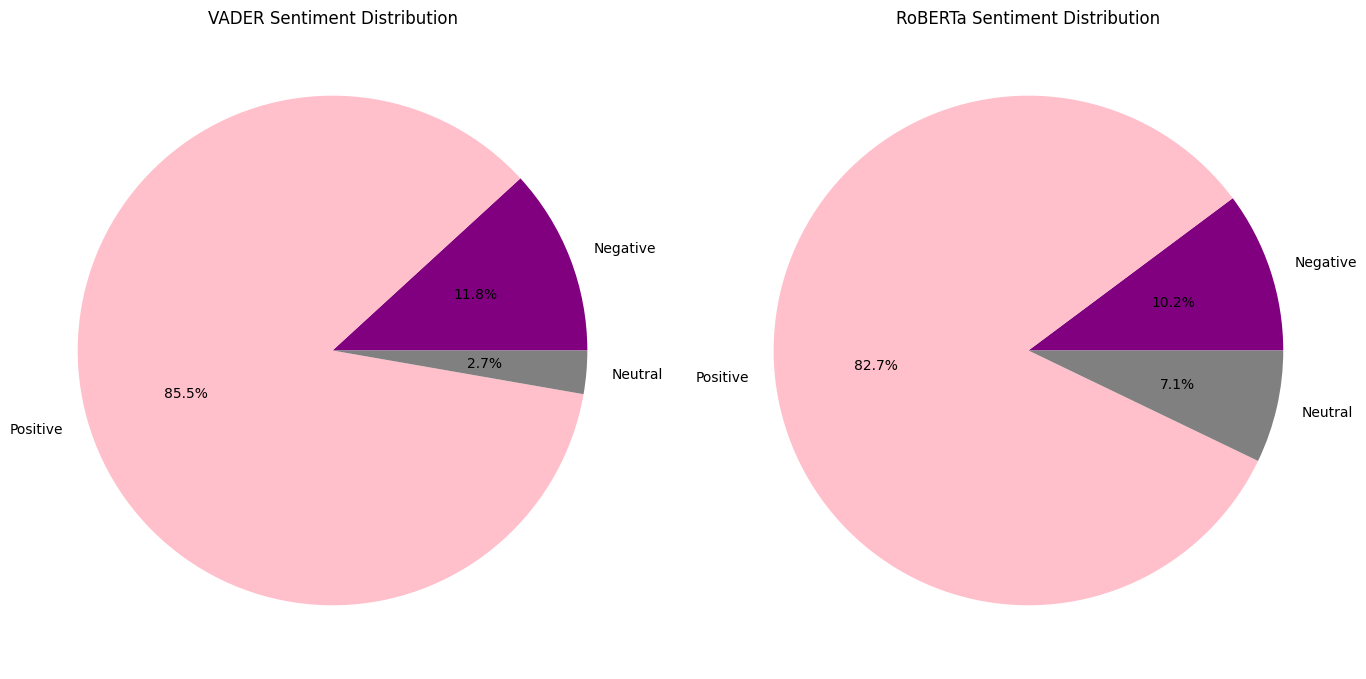

In [69]:
import matplotlib.pyplot as plt

# Sentiment counts for VADER model
vader_counts = [1196, 8658, 278]
vader_labels = ['Negative', 'Positive', 'Neutral']

# Sentiment counts for RoBERTa model
roberta_counts = [1033, 8376, 723]
roberta_labels = ['Negative', 'Positive', 'Neutral']

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Plot VADER sentiment counts
axs[0].pie(vader_counts, labels=vader_labels, autopct='%1.1f%%', colors=['purple', 'pink', 'gray'])
axs[0].set_title('VADER Sentiment Distribution')

# Plot RoBERTa sentiment counts
axs[1].pie(roberta_counts, labels=roberta_labels, autopct='%1.1f%%', colors=['purple', 'pink', 'gray'])
axs[1].set_title('RoBERTa Sentiment Distribution')

# Adjust layout to make room for titles
plt.tight_layout()

# Show the plot
plt.show()


In [70]:
Sentiments_Roberta = Sentiments_Roberta.drop(Sentiments_Roberta.columns[0], axis=1)

# Merge the DataFrames
results = Sentiments.merge(Sentiments_Roberta, how='left', left_index=True, right_index=True)


In [71]:
results

,Combined_Text,neg,neu,pos,compound,Vadar_Sentiment,roberta_neg,roberta_neu,roberta_pos,Roberta_Sentiment
0,tires where delivered to the garage of my choi...,0.000,0.740,0.260,0.9186,positive,0.004545,0.215429,0.780026,positive
1,easy tyre selection process competitive pricin...,0.000,0.381,0.619,0.9509,positive,0.003834,0.096213,0.899953,positive
2,very easy to use and good value for money valu...,0.000,0.356,0.644,0.9259,positive,0.002083,0.029300,0.968617,positive
3,really easy and convenient to arrange ease of ...,0.000,0.430,0.570,0.8516,positive,0.002397,0.060165,0.937438,positive
4,it was so easy to select tyre sizes and arrang...,0.000,0.473,0.527,0.9645,positive,0.003747,0.049713,0.946541,positive
...,...,...,...,...,...,...,...,...,...,...
10127,i ordered the wrong tyres however redacted arr...,0.063,0.606,0.331,0.9231,positive,0.104022,0.336832,0.559146,positive
10128,good experience first time i have used redacte...,0.000,0.651,0.349,0.9324,positive,0.003881,0.035376,0.960743,positive
10129,i ordered the tyre i needed on line booked a s...,0.000,0.671,0.329,0.9686,positive,0.005274,0.066235,0.928491,positive
10130,excellent service from point of order to fitti...,0.232,0.474,0.294,0.3182,positive,0.006839,0.029574,0.963587,positive


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

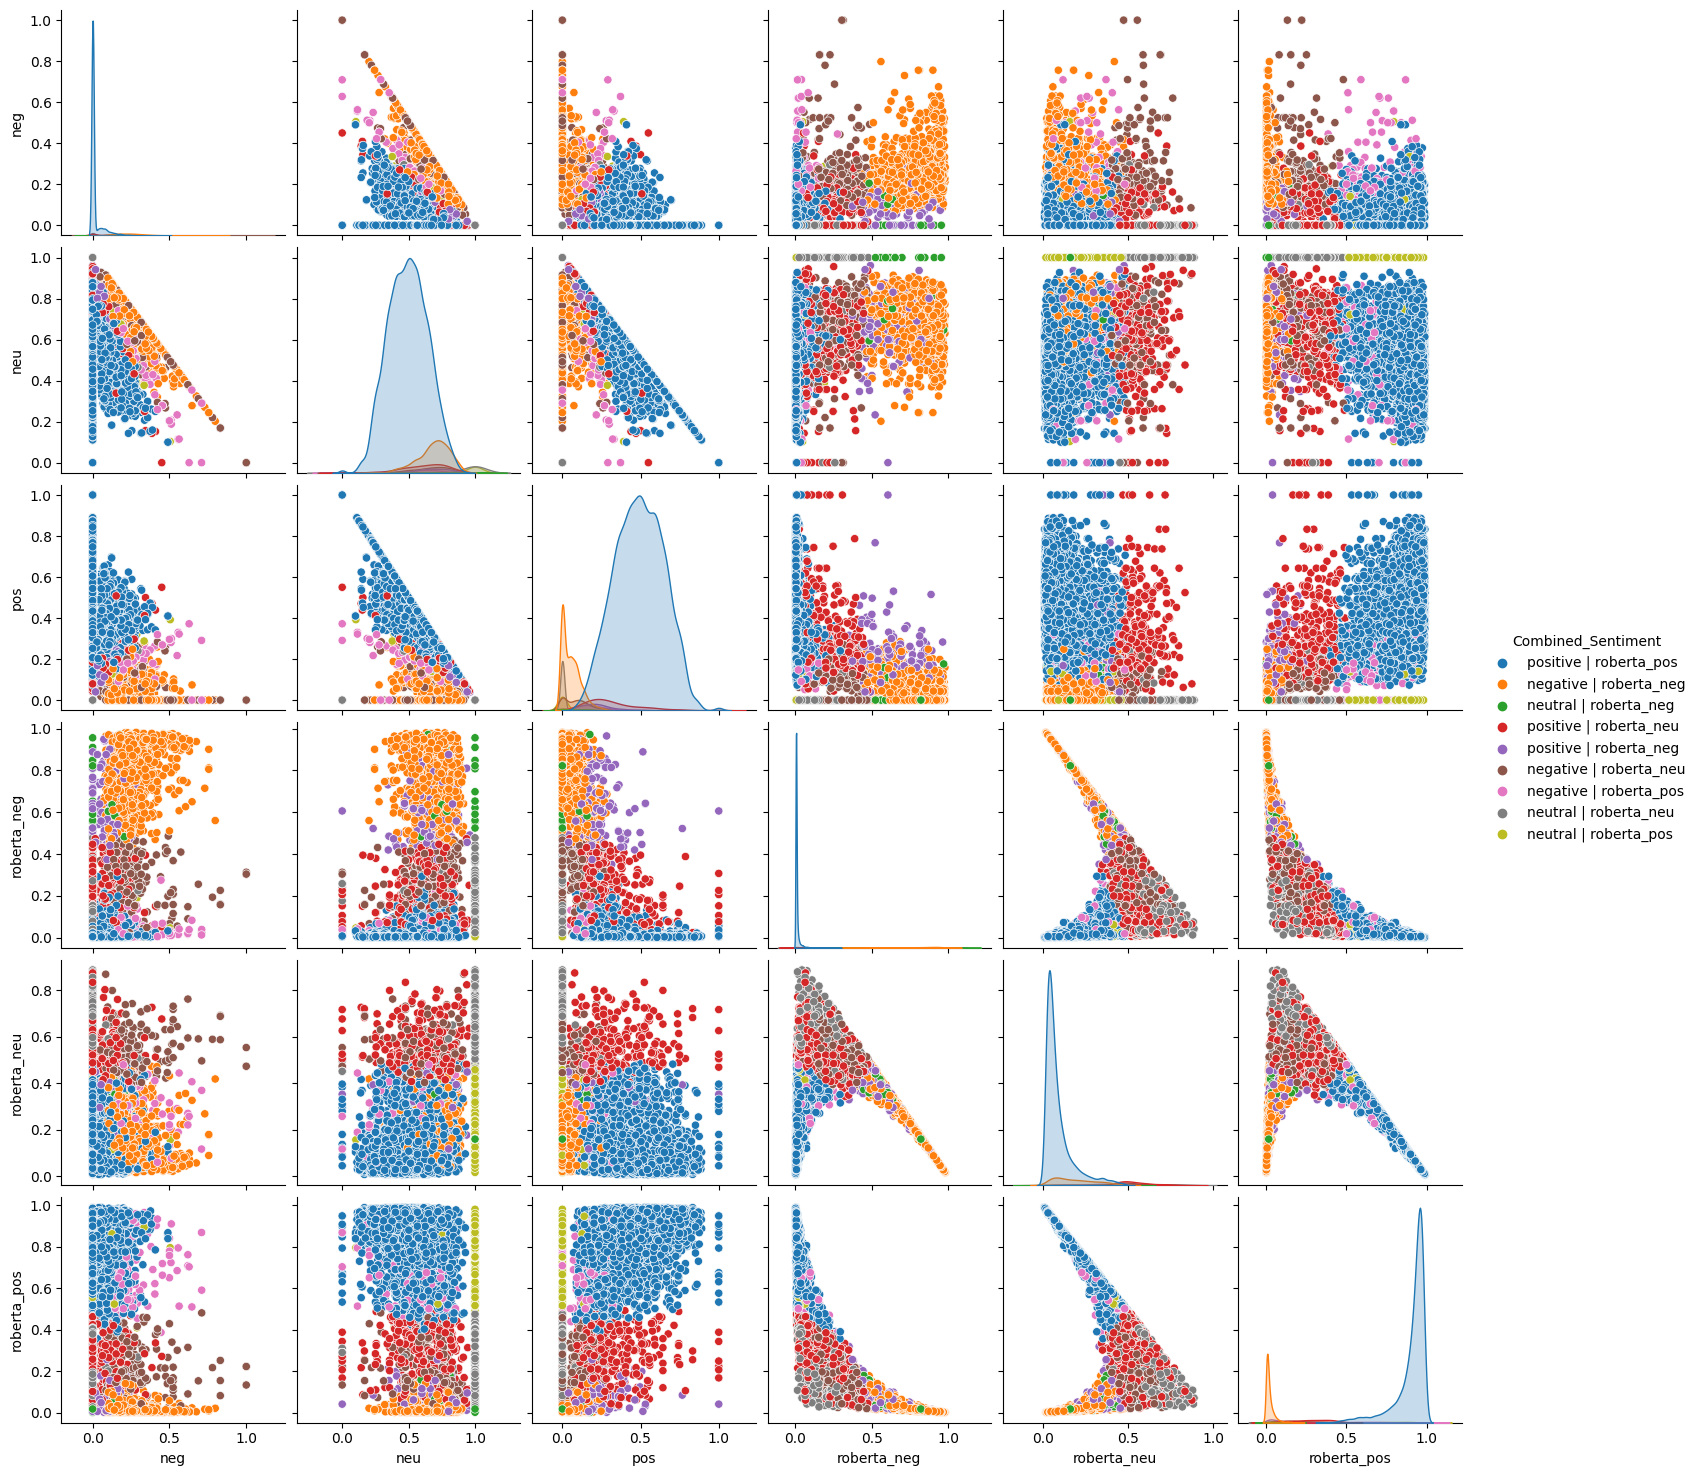

In [76]:

# Define a function to categorize Roberta sentiment based on the highest score
def roberta_sentiment(row):
    scores = {'roberta_neg': row['roberta_neg'], 'roberta_neu': row['roberta_neu'], 'roberta_pos': row['roberta_pos']}
    return max(scores, key=scores.get)

# Add a Roberta sentiment column
results['Roberta_Sentiment'] = results.apply(roberta_sentiment, axis=1)

# Combine the two sentiment columns into one
results['Combined_Sentiment'] = results['Vadar_Sentiment'] + " | " + results['Roberta_Sentiment']

# Plot the pairplot with the combined hue
sns.pairplot(data=results, vars=['neg', 'neu', 'pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'], hue='Combined_Sentiment')
plt.show()

**Subtheme Identification using Topic Modeling (LDA)**

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [78]:

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(dataset['Combined_Text'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Get the top words for each topic
for index, topic in enumerate(lda.components_):
    print(f'Top words for topic #{index}:')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:]])


Top 10 words for topic #0:
['stems', 'cores', 'pulled', 'thissteven', 'slammed', 'theni', 'reluctantlyupon', 'thoughi', 'paperworka', 'dryden', 'afterthought', 'changedbut', 'metali', 'goti', 'fari', 'appearing', 'racked', 'cutter', 'wasis', 'waymcconechys', 'rusted', 'tightest', 'dustcaps', 'fixing', 'metal', 'cutting', 'sick', 'states', 'hospital', 'summary', 'annoyance', 'prevent', 'shout', 'sp', 'traffic', 'annoyed', 'stressed', 'kia', 'forth', 'phones', 'offices', 'ventus', 'pmmy', 'supposedly', 'held', 'loyal', 'headline', 'leaking', 'consulting', 'trader', 'manchester', 'ferrari', 'employees', 'owners', 'maxx', 'potenza', 'profile', 'chunk', 'drives', 'partially', 'skills', 'indicate', 'thurs', 'bccom', 'exceeded', 'beats', 'autocentres', 'losses', 'damages', 'appalled', 'shabby', 'unused', 'version', 'department', 'tyresthey', 'scottish', 'rushing', 'scuffed', 'conditionsthe', 'robin', 'tpms', 'majority', 'outfit', 'suffered', 'toque', 'reminding', 'sharing', 'media', 'social',

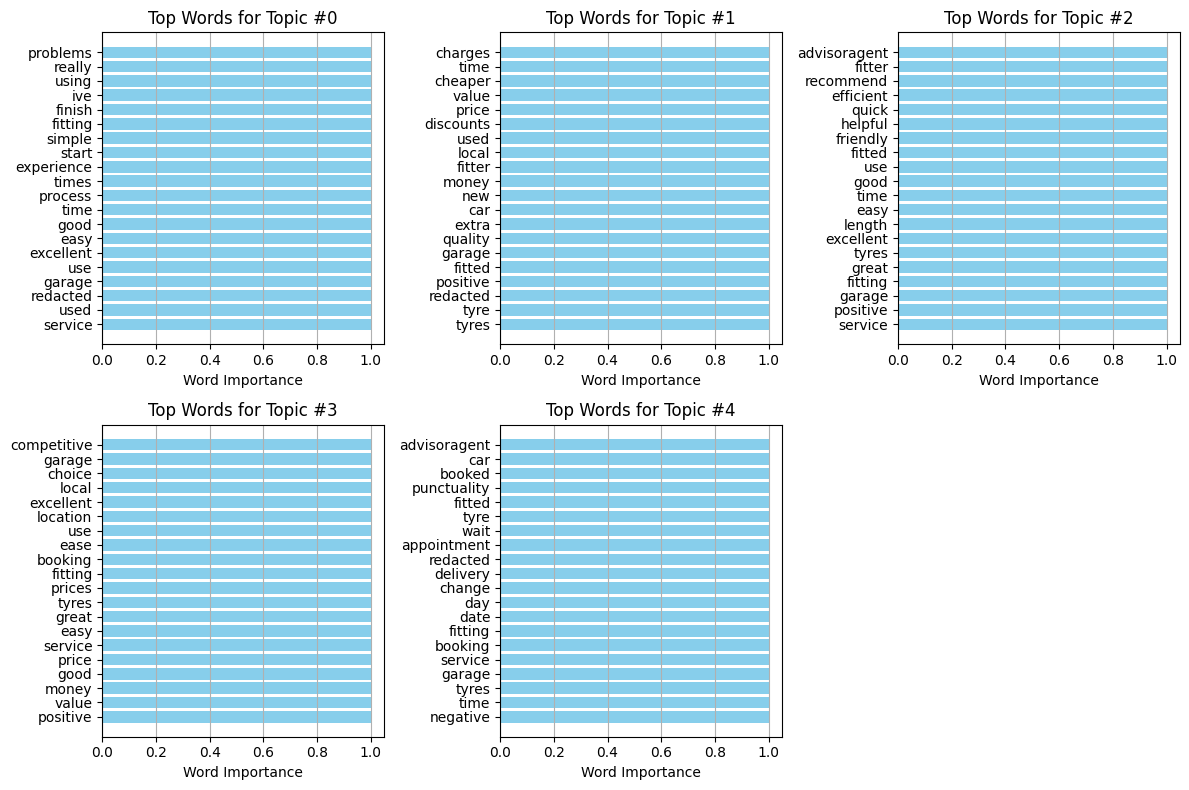

In [88]:
import matplotlib.pyplot as plt

# Get the top words for each topic
num_top_words = 20
topics_words = []

for index, topic in enumerate(lda.components_):
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-num_top_words:]]
    topics_words.append(top_words)

# Plot the top words for each topic
plt.figure(figsize=(12, 8))

for index, topic_words in enumerate(topics_words):
    plt.subplot(2, 3, index+1)  # Adjust subplot layout as per the number of topics
    plt.barh(range(num_top_words), [1]*num_top_words, color='white', edgecolor='white')  # Creating blank bars for alignment
    plt.barh(range(num_top_words), [1]*num_top_words, tick_label=topic_words, color='skyblue')  # Plotting actual bars
    plt.title(f'Top Words for Topic #{index}')
    plt.xlabel('Word Importance')
    plt.gca().invert_yaxis()  # Invert y-axis to display top words at the top
    plt.grid(axis='x')  # Add gridlines for better readability

plt.tight_layout()  # Adjust subplot layout
plt.show()


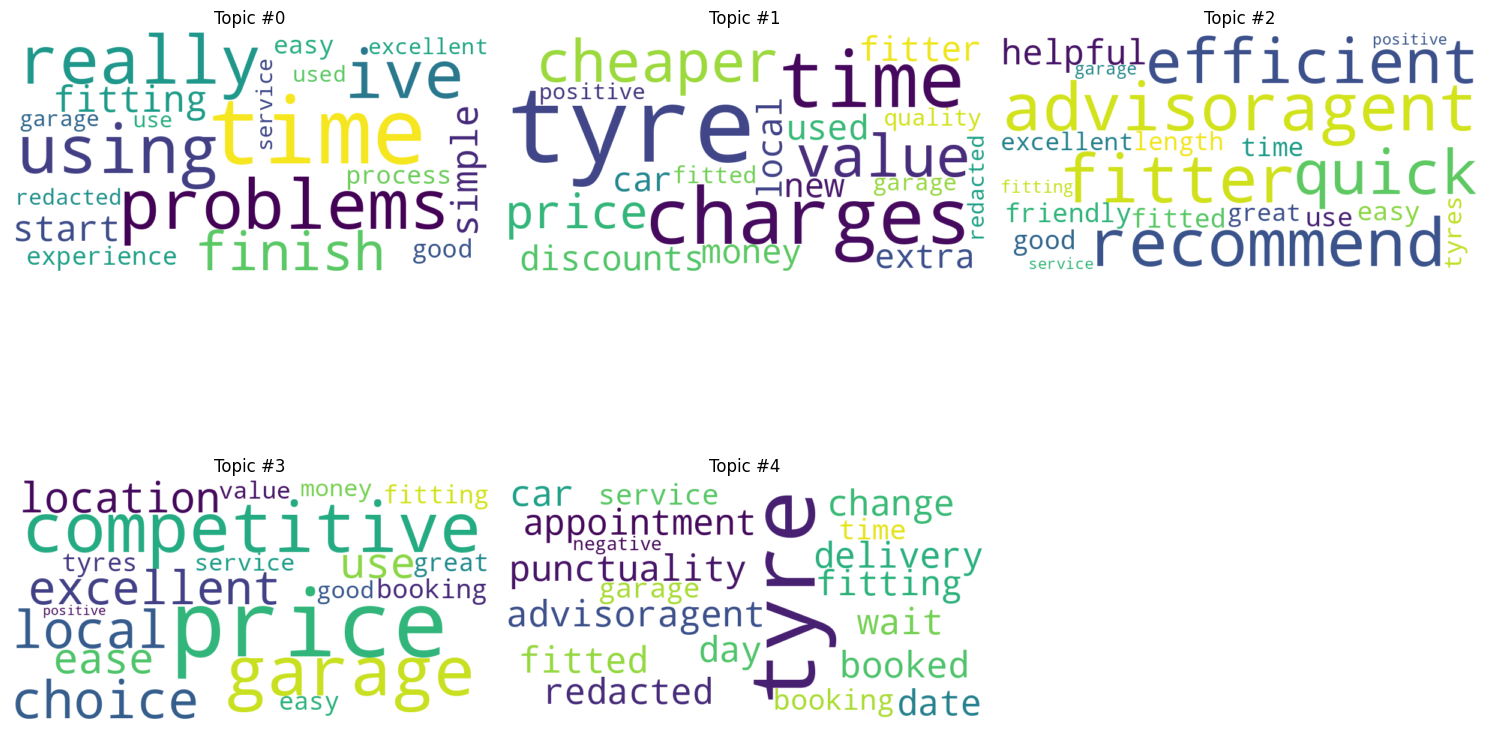

In [87]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the top words for each topic
num_top_words = 20
topics_words = []

for index, topic in enumerate(lda.components_):
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-num_top_words:]]
    topics_words.append(' '.join(top_words))

# Plot word clouds for each topic
plt.figure(figsize=(15, 10))

for index, topic_words in enumerate(topics_words):
    plt.subplot(2, 3, index+1)  # Adjust subplot layout as per the number of topics
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topic_words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic #{index}')
    plt.axis('off')  # Turn off axes for better visualization

plt.tight_layout()  # Adjust subplot layout
plt.show()


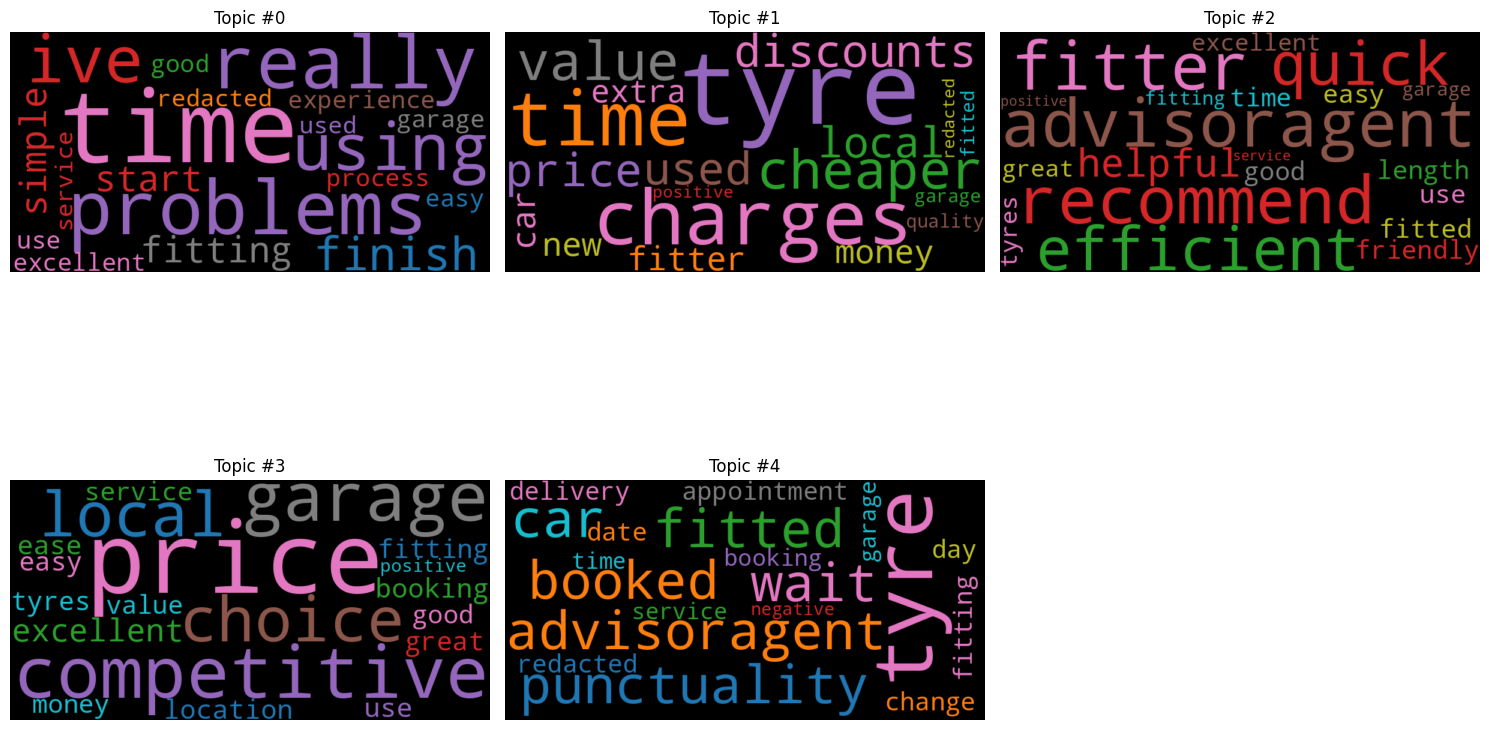

In [86]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the top words for each topic
num_top_words = 20
topics_words = []

for index, topic in enumerate(lda.components_):
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-num_top_words:]]
    topics_words.append(' '.join(top_words))

# Plot word clouds for each topic
plt.figure(figsize=(15, 10))

for index, topic_words in enumerate(topics_words):
    plt.subplot(2, 3, index+1)  # Adjust subplot layout as per the number of topics
    wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='tab10').generate(topic_words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic #{index}')
    plt.axis('off')  # Turn off axes for better visualization

plt.tight_layout()  # Adjust subplot layout
plt.show()
